In [86]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess   

In [87]:
# read from data file
pz_origin_dat = np.loadtxt("data/C_f_DBSR.dat")[:,0]    # in a.u.
MEV_AU = 268.102    # 1 MeV/c = 268.102 a.u.
pz_origin = pz_origin_dat / MEV_AU   # convert to MeV/c

In [88]:

def get_wavefunction_value(nE, kappa, m, p):
    result = subprocess.run(['./spinor_wave_function_test', str(nE), str(kappa), str(m), str(p[0]), str(p[1]), str(p[2])], capture_output=True, text=True)
    output = result.stdout.strip()
    values = list(map(float, output.split(',')))
    return values

def get_wavefunction_value_Linear_I(nE, kappa, m, p):
    result = subprocess.run(['./spinor_wave_function_test_linear', str(nE), str(kappa), str(m), str(p[0]), str(p[1]), str(p[2])], capture_output=True, text=True)
    output = result.stdout.strip()
    values = list(map(float, output.split(',')))
    return values

In [99]:
nE=2
kappa=1
m=0.5

In [100]:
def calc_u_abs(wf):
    return [np.sqrt(wf[2*k]**2 + wf[2*k+1]**2) for k in range(4)]

pz_values = np.linspace(0, 0.04, 200)
px_value = 0.0
py_value = 0.0

u_abs = [[] for _ in range(4)]
u_abs_o = [[] for _ in range(4)]

for pz in pz_values:
    p = [px_value, py_value, pz]
    wf = get_wavefunction_value(nE, kappa, m, p)
    for k, val in enumerate(calc_u_abs(wf)):
        u_abs[k].append(val)

for pz_o in pz_origin:
    p_o = [px_value, py_value, pz_o]
    wf_o = get_wavefunction_value(nE, kappa, m, p_o)
    for k, val in enumerate(calc_u_abs(wf_o)):
        u_abs_o[k].append(val)

u1_abs, u2_abs, u3_abs, u4_abs = [np.array(arr) for arr in u_abs]
u1_abs_o, u2_abs_o, u3_abs_o, u4_abs_o = [np.array(arr) for arr in u_abs_o]
pz = pz_values


/tmp/ipykernel_226033/3676566190.py:19: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(*ylims[i])


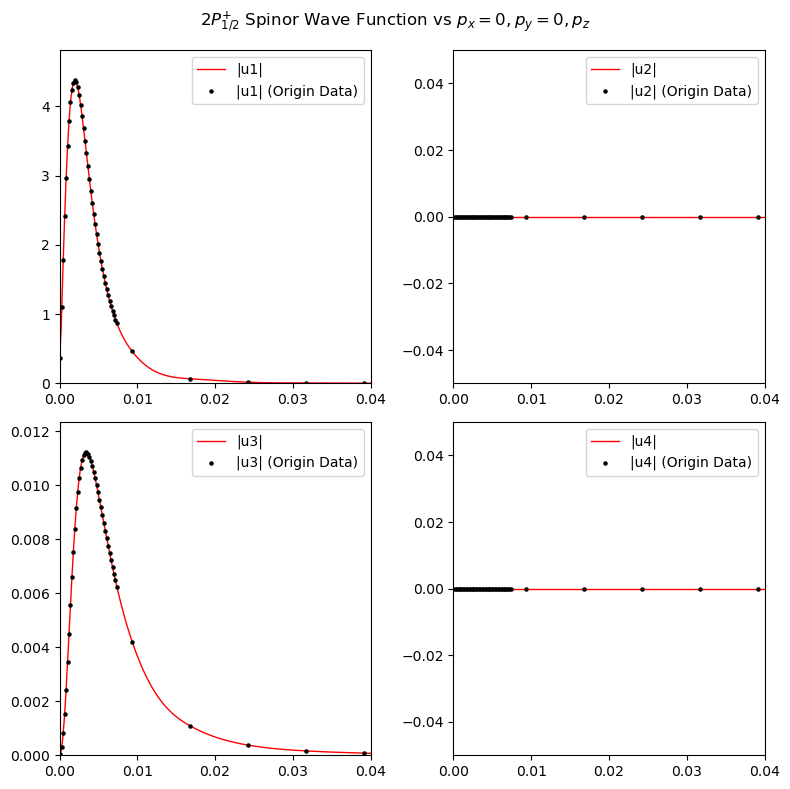

In [102]:

plotparams={
    'linewidth': 1,
    'color': 'red'
}
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
labels = ['|u1|', '|u2|', '|u3|', '|u4|']
data = [u1_abs, u2_abs, u3_abs, u4_abs]
data_o = [u1_abs_o, u2_abs_o, u3_abs_o, u4_abs_o]
ylims = [
    (0, np.max(u1_abs)*1.1),
    (0, np.max(u2_abs)*1.1),
    (0, np.max(u3_abs)*1.1),
    (0, np.max(u4_abs)*1.1)
]

for i, ax in enumerate(axs.flat):
    ax.plot(pz, data[i], label=labels[i], **plotparams)
    ax.scatter(pz_origin, data_o[i], color='black', s=20, label=f'{labels[i]} (Origin Data)',zorder=2, marker=".")
    ax.set_ylim(*ylims[i])
    ax.set_xlim(np.min(pz), np.max(pz))
    ax.legend()

fig.suptitle('$2P^{+}_{1/2}$ Spinor Wave Function vs $p_x = 0, p_y = 0, p_z$')
fig.tight_layout()
fig.savefig('spinor_wave_function_scan.png', dpi=300)

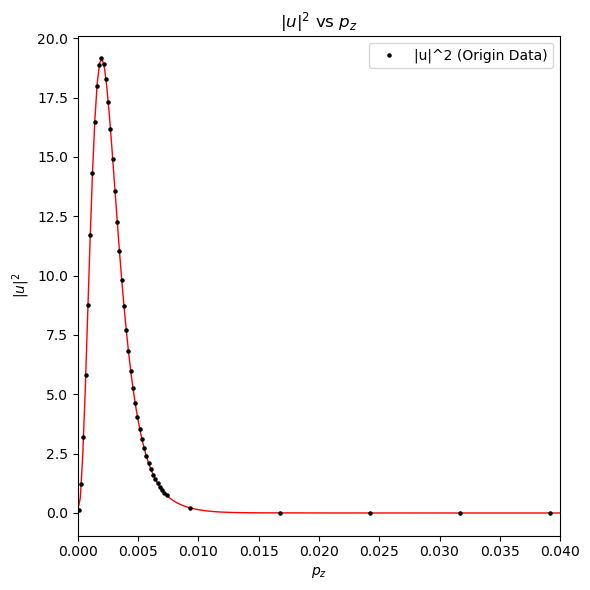

In [103]:

u_abs_sq = u1_abs**2 + u2_abs**2 + u3_abs**2 + u4_abs**2

fig4, ax4 = plt.subplots(figsize=(6, 6))
ax4.plot(pz, u_abs_sq, **plotparams)
ax4.scatter(pz_origin, u1_abs_o**2 + u2_abs_o**2 + u3_abs_o**2 + u4_abs_o**2, color='black', s=20, label='|u|^2 (Origin Data)', zorder=2, marker=".")
ax4.set_xlabel('$p_z$')
ax4.set_ylabel('$|u|^2$')
ax4.set_title('$|u|^2$ vs $p_z$')
ax4.set_xlim(np.min(pz), np.max(pz))
ax4.legend()
fig4.tight_layout()
fig4.savefig('spinor_wave_function_abs_sq_vs_pz.png', dpi=300)


In [104]:

px_values = np.linspace(-0.04, 0.04, 100)
py_values = np.linspace(-0.04, 0.04, 100)
pz_value = 0.01
u_abs_scan = np.zeros((4, len(px_values), len(py_values)))

for i, px in enumerate(px_values):
    for j, py in enumerate(py_values):
        p = [px, py, pz_value]
        wf = get_wavefunction_value(nE, kappa, m, p)
        for k in range(4):
            u_abs_scan[k, i, j] = np.sqrt(wf[2*k]**2 + wf[2*k+1]**2)



In [105]:
plot2d_params = {
    # 'cmap': 'plasma',
    'cmap': 'viridis',
    'origin': 'lower',
    'interpolation': 'bilinear',
    'aspect': 'auto'

}

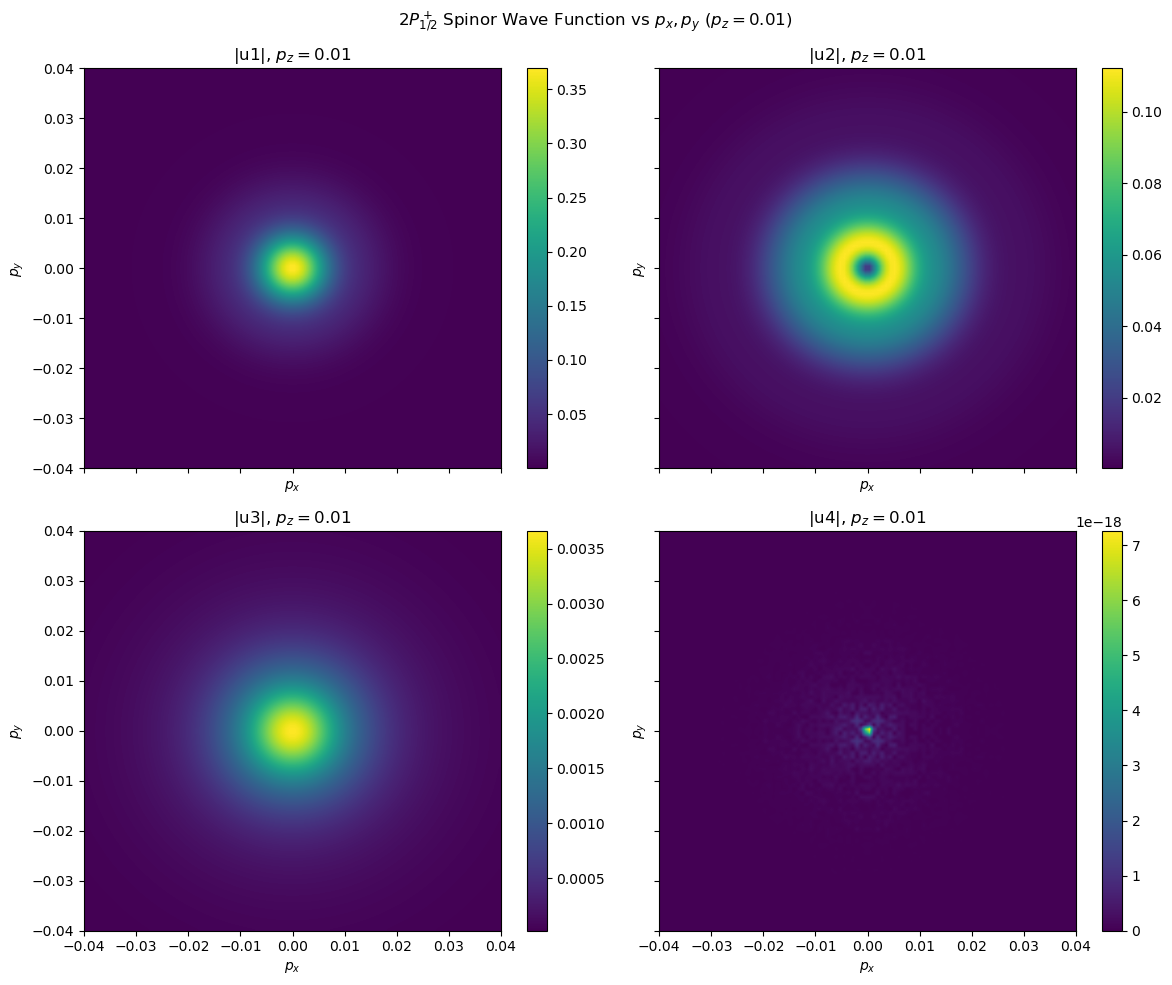

In [108]:

fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
for idx, ax in enumerate(axs2.flat):
    im = ax.imshow(u_abs_scan[idx].T, extent=[px_values[0], px_values[-1], py_values[0], py_values[-1]], **plot2d_params)
    ax.set_title(f'|u{idx+1}|, $p_z={pz_value}$')
    ax.set_xlabel('$p_x$')
    ax.set_ylabel('$p_y$')
    fig2.colorbar(im, ax=ax)
fig2.suptitle(f'$2P^+_{{1/2}}$ Spinor Wave Function vs $p_x, p_y$ ($p_z={pz_value}$)')
fig2.tight_layout()
fig2.savefig('spinor_wave_function_scan_px_py.png', dpi=300)


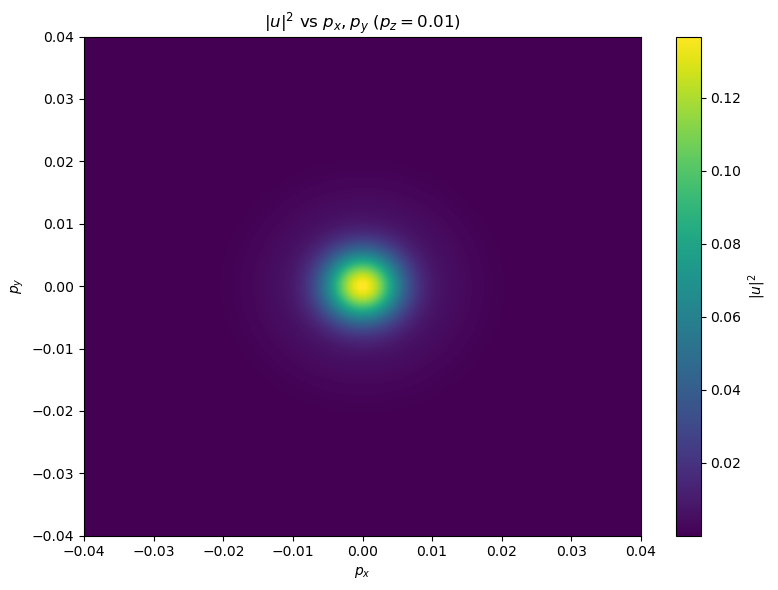

In [109]:

u_abs_sq_scan = np.sum(u_abs_scan**2, axis=0)

fig3, ax3 = plt.subplots(figsize=(8, 6))
im = ax3.imshow(u_abs_sq_scan.T, extent=[px_values[0], px_values[-1], py_values[0], py_values[-1]], **plot2d_params)
ax3.set_xlabel('$p_x$')
ax3.set_ylabel('$p_y$')
ax3.set_title(f'$|u|^2$ vs $p_x, p_y$ ($p_z={pz_value}$)')
fig3.colorbar(im, ax=ax3, label='$|u|^2$')
fig3.tight_layout()
fig3.savefig('spinor_wave_function_abs_sq_vs_px_py.png', dpi=300)

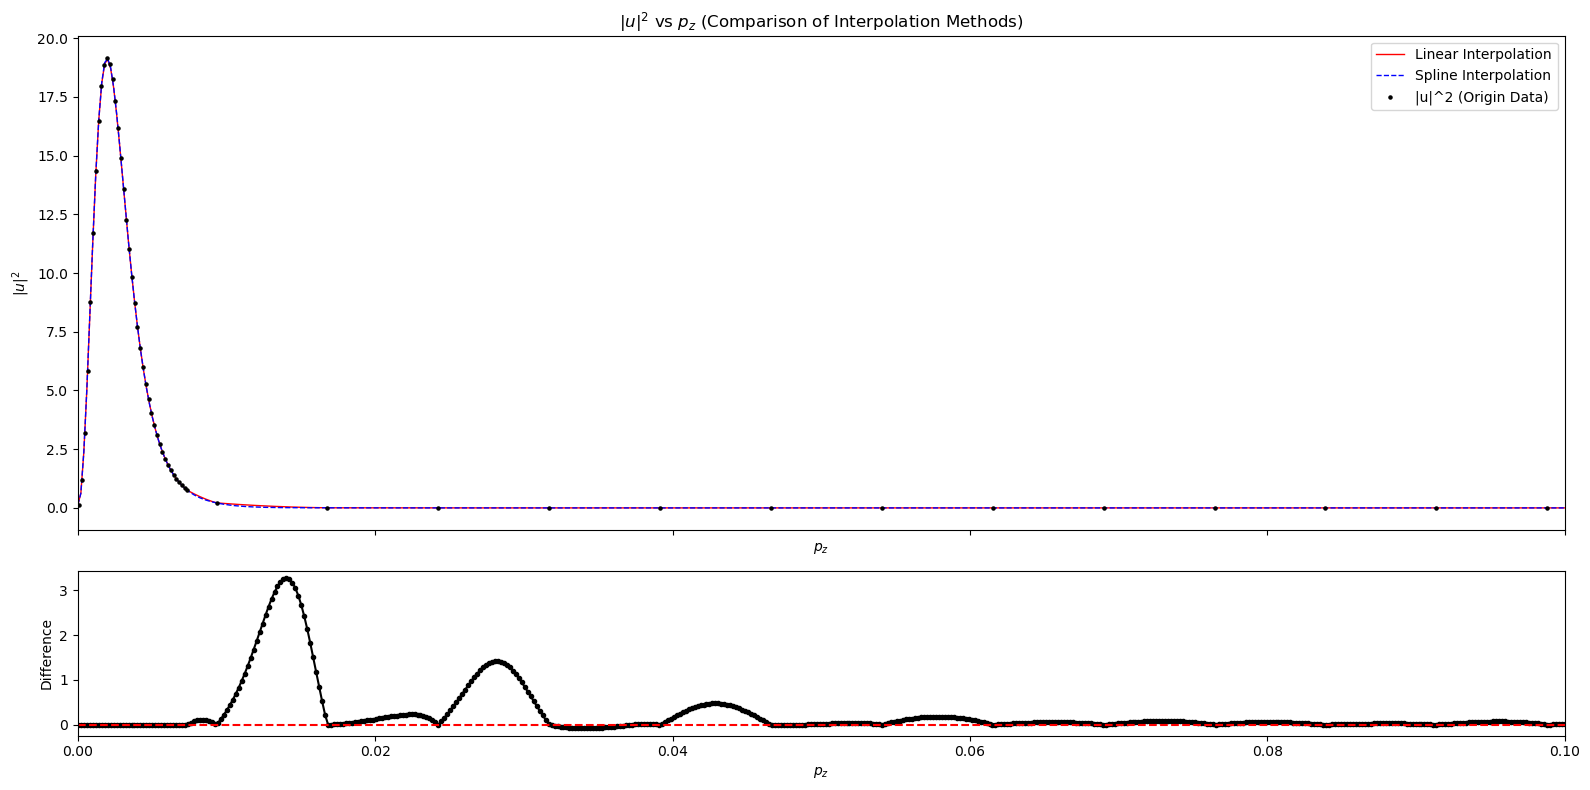

In [115]:

# validation linear interpolation
px_value = 0.0
py_value = 0.0
pz_value = np.linspace(0, 0.1, 500)
u_abs_sq_l = []
u_abs_sq_s = []
for pz in pz_value:
    p = [px_value, py_value, pz]
    wf = get_wavefunction_value_Linear_I(nE, kappa, m, p)
    u_abs_sq = wf[0]**2 + wf[1]**2 + wf[2]**2 + wf[3]**2 + wf[4]**2 + wf[5]**2 + wf[6]**2 + wf[7]**2
    u_abs_sq_l.append(u_abs_sq)
    wf_s = get_wavefunction_value(nE, kappa, m, p)
    u_abs_sq_s_val = wf_s[0]**2 + wf_s[1]**2 + wf_s[2]**2 + wf_s[3]**2 + wf_s[4]**2 + wf_s[5]**2 + wf_s[6]**2 + wf_s[7]**2
    u_abs_sq_s.append(u_abs_sq_s_val)
u_abs_sq_o = []
for pz_o in pz_origin:
    p_o = [px_value, py_value, pz_o]
    wf_o = get_wavefunction_value(nE, kappa, m, p_o)
    u_abs_sq_o_val = wf_o[0]**2 + wf_o[1]**2 + wf_o[2]**2 + wf_o[3]**2 + wf_o[4]**2 + wf_o[5]**2 + wf_o[6]**2 + wf_o[7]**2
    u_abs_sq_o.append(u_abs_sq_o_val)

fig5, ax5s = plt.subplots(2, 1, figsize=(16, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax5=ax5s[0]
ax5.plot(pz_value, u_abs_sq_l, label='Linear Interpolation', color='red', linewidth=1)
ax5.plot(pz_value, u_abs_sq_s, label='Spline Interpolation', linestyle='--', color='blue', linewidth=1)
ax5.scatter(pz_origin, u_abs_sq_o, color='black', s=20, label='|u|^2 (Origin Data)', zorder=2, marker=".")
ax5.set_xlim(np.min(pz_value), np.max(pz_value))
ax5.set_xlabel('$p_z$')
ax5.set_ylabel('$|u|^2$')
ax5.set_title('$|u|^2$ vs $p_z$ (Comparison of Interpolation Methods)')
ax5.legend()
# Add zoomed inset
# axins = ax5.inset_axes([0.55, 0.05, 0.4, 0.4])
# axins.plot(pz_value, u_abs_sq_l, color='red', linewidth=1)
# axins.plot(pz_value, u_abs_sq_s, linestyle='--', color='blue', linewidth=1)

# axins.scatter(pz_origin, u_abs_sq_o, color='black', s=20, zorder=2, marker=".")
# axins.set_xlim(0.0011, 0.00125)
# axins.set_ylim(70, 80)
# axins.set_xticks([0.0011, 0.0012, 0.00125])
# axins.set_yticks([70, 80])
# ax5.indicate_inset_zoom(axins, edgecolor="black")

ax5diff=ax5s[1]
diff=(np.array(u_abs_sq_l)-np.array(u_abs_sq_s))/(np.array(u_abs_sq_s))
ax5diff.plot(pz_value,diff, color='black', marker=".")
ax5diff.set_xlabel('$p_z$')
ax5diff.set_ylabel('Difference')
ax5diff.hlines(0, np.min(pz_value), np.max(pz_value), colors='red', linestyles='dashed')
fig5.tight_layout()
fig5.savefig('spinor_wave_function_abs_sq_vs_pz_comparison.png', dpi=300)
